In [1]:
import anndata
import scanpy as sc
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt
import loompy
#import anndata2ri
scv.set_figure_params()

In [2]:
#wt
#f13="/home/DATA/zhengjie/DATA/yuzuoren/F13_PYMT/velocyto/F13_PYMT.loom"
#f14="/home/DATA/zhengjie/DATA/yuzuoren/F14_PYMT/velocyto/F14_PYMT.loom"
#nc
f12="/home/DATA/zhengjie/DATA/yuzuoren/F12_PYMT/velocyto/F12_PYMT.loom"
f17="/home/DATA/zhengjie/DATA/yuzuoren/F17_PYMT/velocyto/F17_PYMT.loom"
#cs
f15="/home/DATA/zhengjie/DATA/yuzuoren/F15_PYMT/velocyto/F15_PYMT.loom"
f19="/home/DATA/zhengjie/DATA/yuzuoren/F19_PYMT/velocyto/F19_PYMT.loom"

In [3]:
#adata = sc.read_loom("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.Neu.rds.loom", sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene', dtype='float32')
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.Neu.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.Neu.umap.csv",delimiter=",", index_col=0)
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.MF.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.MF.umap.csv",delimiter=",", index_col=0)
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.T.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/wt-nc.T.umap.csv",delimiter=",", index_col=0)

#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.Neu.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.Neu.umap.csv",delimiter=",", index_col=0)
#new
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.Neu_new.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.Neu_new.umap.csv",delimiter=",", index_col=0)

#去批次
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/Neu.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/Neu.umap.csv",delimiter=",", index_col=0)

#去批次 重新命名
obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/PLOT/Neu.metadata.csv",delimiter=",", index_col=0)
umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/PLOT/Neu.umap.csv",delimiter=",", index_col=0)

#去批次 T
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/T.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/T.umap.csv",delimiter=",", index_col=0)

#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.MF.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.MF.umap.csv",delimiter=",", index_col=0)
#obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.T.metadata.csv",delimiter=",", index_col=0)
#umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out_merge/cs-nc.T.umap.csv",delimiter=",", index_col=0)

#obs=obs[["sam","sample","celltype"]]
obs=obs[["group","sample","celltype"]]
obs["cellname"]=obs.index
umap["cellname"]=umap.index
obs_umap=obs.merge(umap)
obs_umap.head()

,group,sample,celltype,cellname,UMAP_1,UMAP_2
0,NC,L-NC-F12,N2,AAACCCACATGTCTAG-1_1,-0.742661,2.779540
1,NC,L-NC-F12,N2,AAACGAAGTTACCGTA-1_1,0.449166,1.259000
2,NC,L-NC-F12,N2,AAACGAATCGACATAC-1_1,1.491372,1.590728
3,NC,L-NC-F12,N2,AAACGCTAGCGACTTT-1_1,0.075501,1.949154
4,NC,L-NC-F12,N1,AAAGAACCACTCGATA-1_1,1.956660,0.885562


In [4]:
obs1=obs_umap[obs_umap["sample"]=='L-WT-F13']
obs2=obs_umap[obs_umap["sample"]=='L-WT-F14']
obs3=obs_umap[obs_umap["sample"]=='L-NC-F12']
obs4=obs_umap[obs_umap["sample"]=='L-NC-F17']
obs5=obs_umap[obs_umap["sample"]=='L-CS-F15']
obs6=obs_umap[obs_umap["sample"]=='L-CS-F19']



In [5]:
obs1


,group,sample,celltype,cellname,UMAP_1,UMAP_2


In [6]:
## F13
f13="/home/DATA/zhengjie/DATA/yuzuoren/F13_PYMT/velocyto/F13_PYMT.loom"
obs1=obs_umap[obs_umap["sample"]=='L-WT-F13']

f13 = scv.read(f13, cache=True)
f13.var
f13.var_names_make_unique
f13.obs
f13.obs=f13.obs.rename(index = lambda x: x.replace('F13_PYMT:', ''))
f13.obs=f13.obs.rename(index = lambda x: x.replace('x', ''))
f13.obs.head()

obs1.cellname=obs1.cellname.replace({"_1":""},regex=True)
obs1.cellname=obs1.cellname.replace({"-1":""},regex=True)
obs1.head()

f13_filter = f13[np.isin(f13.obs.index,obs1["cellname"])]

index=pd.DataFrame(f13_filter.obs.index)
index = index.rename(columns = {0:'cellname'})
obs1=index.merge(obs1,on="cellname")
obs1.index=obs1['cellname']
obs1.head()
#将umap信息加入sample
obs1_umap = obs1.iloc[:,4:]
obs1_umap.head()
f13_filter.obsm["X_umap"]=obs1_umap.values
#将cell_clusters加入sample_one
obs1_cluster = obs1.iloc[:,3]
obs1_cluster.head()
f13_filter.obs['cell_clusters']=obs1_cluster.values

In [7]:
## F14
f14="/home/DATA/zhengjie/DATA/yuzuoren/F14_PYMT/velocyto/F14_PYMT.loom"
obs3=obs_umap[obs_umap["sample"]=='L-WT-F14']

f14 = scv.read(f14, cache=True)
f14.var
f14.var_names_make_unique
f14.obs
f14.obs=f14.obs.rename(index = lambda x: x.replace('F14_PYMT:', ''))
f14.obs=f14.obs.rename(index = lambda x: x.replace('x', ''))
f14.obs.head()

obs3.cellname=obs3.cellname.replace({"_2":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f14_filter = f14[np.isin(f14.obs.index,obs3["cellname"])]

index=pd.DataFrame(f14_filter.obs.index)
index = index.rename(columns = {0:'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f14_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f14_filter.obs['cell_clusters']=obs3_cluster.values

In [8]:
## F12
f12="/home/DATA/zhengjie/DATA/yuzuoren/F12_PYMT/velocyto/F12_PYMT.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F12']

f12 = scv.read(f12, cache=True)
f12.var
f12.var_names_make_unique
f12.obs
f12.obs=f12.obs.rename(index = lambda x: x.replace('F12_PYMT:', ''))
f12.obs=f12.obs.rename(index = lambda x: x.replace('x', ''))
f12.obs.head()

obs3.cellname=obs3.cellname.replace({"_3":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f12_filter = f12[np.isin(f12.obs.index,obs3["cellname"])]

index=pd.DataFrame(f12_filter.obs.index)
index = index.rename(columns = {0:'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f12_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f12_filter.obs['cell_clusters']=obs3_cluster.values

In [9]:
## F17
f17="/home/DATA/zhengjie/DATA/yuzuoren/F17_PYMT/velocyto/F17_PYMT.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F17']
f17 = scv.read(f17, cache=True)
f17.var
f17.var_names_make_unique
f17.obs
f17.obs=f17.obs.rename(index = lambda x: x.replace('F17_PYMT:', ''))
f17.obs=f17.obs.rename(index = lambda x: x.replace('x', ''))
f17.obs.head()

obs3.cellname=obs3.cellname.replace({"_4":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f17_filter = f17[np.isin(f17.obs.index,obs3["cellname"])]

index=pd.DataFrame(f17_filter.obs.index)
index = index.rename(columns = {0:'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f17_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f17_filter.obs['cell_clusters']=obs3_cluster.values

In [11]:
f13_filter.var_names_make_unique()
f14_filter.var_names_make_unique()
f12_filter.var_names_make_unique()
f17_filter.var_names_make_unique()
adata = f13_filter.concatenate(f14_filter,f12_filter,f17_filter)
adata

AnnData object with n_obs × n_vars = 0 × 36601
    obs: 'Clusters', '_X', '_Y', 'cell_clusters', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
  ## cs- nc
    ## F12
f12="/home/DATA/zhengjie/DATA/yuzuoren/F12_PYMT2/velocyto/F12_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F12']

f12 = scv.read(f12, cache=True)
f12.var
f12.var_names_make_unique
f12.obs
f12.obs=f12.obs.rename(index = lambda x: x.replace('F12_PYMT2:', ''))
f12.obs=f12.obs.rename(index = lambda x: x.replace('x', ''))
f12.obs.head()

obs3.cellname=obs3.cellname.replace({"_1":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f12_filter = f12[np.isin(f12.obs.index,obs3["cellname"])]

index=pd.DataFrame(f12_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f12_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f12_filter.obs['cell_clusters']=obs3_cluster.values

## F17
f17="/home/DATA/zhengjie/DATA/yuzuoren/F17_PYMT2/velocyto/F17_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F17']
f17 = scv.read(f17, cache=True)
f17.var
f17.var_names_make_unique
f17.obs
f17.obs=f17.obs.rename(index = lambda x: x.replace('F17_PYMT2:', ''))
f17.obs=f17.obs.rename(index = lambda x: x.replace('x', ''))
f17.obs.head()

obs3.cellname=obs3.cellname.replace({"_2":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f17_filter = f17[np.isin(f17.obs.index,obs3["cellname"])]

index=pd.DataFrame(f17_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f17_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f17_filter.obs['cell_clusters']=obs3_cluster.values

## F15
f15="/home/DATA/zhengjie/DATA/yuzuoren/F15_PYMT2/velocyto/F15_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-CS-F15']

f15 = scv.read(f15, cache=True)
f15.var
f15.var_names_make_unique
f15.obs
f15.obs=f15.obs.rename(index = lambda x: x.replace('F15_PYMT2:', ''))
f15.obs=f15.obs.rename(index = lambda x: x.replace('x', ''))
f15.obs.head()

obs3.cellname=obs3.cellname.replace({"_3":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f15_filter = f15[np.isin(f15.obs.index,obs3["cellname"])]

index=pd.DataFrame(f15_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f15_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f15_filter.obs['cell_clusters']=obs3_cluster.values

## F19
f19="/home/DATA/zhengjie/DATA/yuzuoren/F19_PYMT2/velocyto/F19_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-CS-F19']

f19 = scv.read(f19, cache=True)
f19.var
f19.var_names_make_unique
f19.obs
f19.obs=f19.obs.rename(index = lambda x: x.replace('F19_PYMT2:', ''))
f19.obs=f19.obs.rename(index = lambda x: x.replace('x', ''))
f19.obs.head()

obs3.cellname=obs3.cellname.replace({"_4":""},regex=True)
obs3.cellname=obs3.cellname.replace({"-1":""},regex=True)
obs3.head()

f19_filter = f19[np.isin(f19.obs.index,obs3["cellname"])]

index=pd.DataFrame(f19_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f19_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f19_filter.obs['cell_clusters']=obs3_cluster.values

In [6]:
f12_filter.var_names_make_unique()
f17_filter.var_names_make_unique()
f15_filter.var_names_make_unique()
f19_filter.var_names_make_unique()
adata = f12_filter.concatenate(f17_filter,f15_filter,f19_filter)

In [7]:
#Running RNA Velocity
sample_one=adata
sample_one

AnnData object with n_obs × n_vars = 9753 × 32285
    obs: 'Clusters', '_X', '_Y', 'cell_clusters', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

Filtered out 30100 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


2023-02-19 12:53:49.887693: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zhengjie/usr/lib:/home/zhengjie/usr/lib64
2023-02-19 12:53:49.887753: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


    finished (0:00:27) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/9753 [00:00<?, ?cells/s]

    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


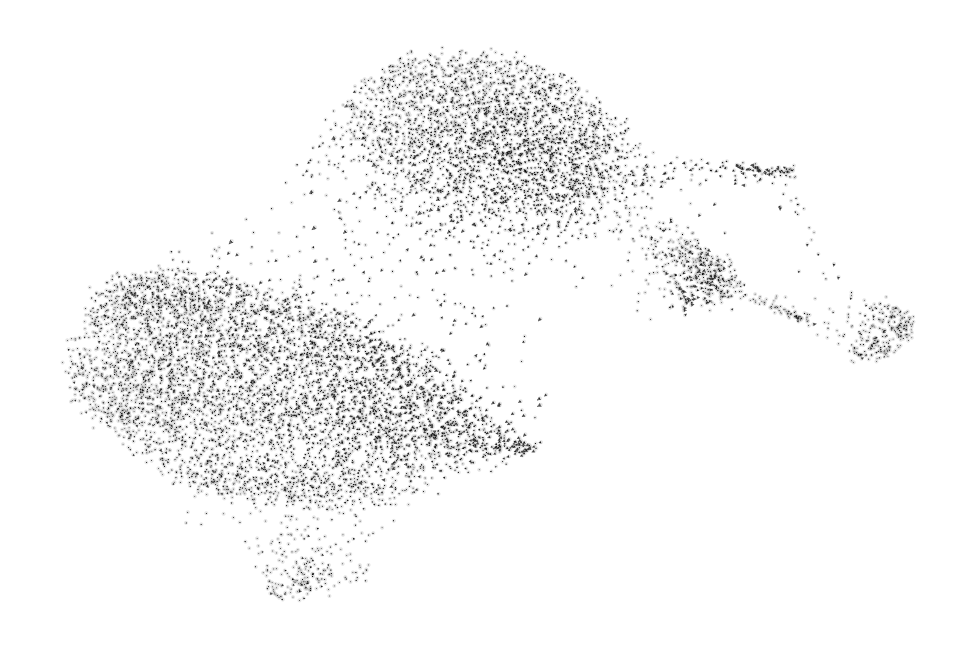

In [8]:
scv.pp.remove_duplicate_cells(sample_one)
scv.pp.filter_and_normalize(sample_one,min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(sample_one, n_pcs=30, n_neighbors=30)
scv.tl.velocity(sample_one, mode = "dynamical") #stochastic
scv.tl.velocity_graph(sample_one)
scv.pl.velocity_embedding(sample_one, basis='X_umap',arrow_size=5)


In [9]:
sample_one
sample_one.obs[['batch']]
pri = sample_one.obs[['cell_clusters']]
type(pri)
pri["Celltype"]=pri['cell_clusters']

for indexs in pri.index: 
    if(pri.loc[indexs].values[0] =='N1'): 
        #print(indexs,0)
        # 查询到bbb就在ZZ里面赋值1
        pri.loc[indexs,'Celltype'] = "N2"
        
    if(pri.loc[indexs].values[0] =='N2'): 
        #print(indexs,0)
        # 查询到bbb就在ZZ里面赋值1
        pri.loc[indexs,'Celltype'] = "N1"

print(pri.head())

sample_one.obs['cell_clusters_new']=pri.loc[:,'Celltype']

                   cell_clusters Celltype
CellID                                   
AAACGCTAGCGACTTT-0            N2       N1
AAACGAATCGACATAC-0            N2       N1
AAACCCACATGTCTAG-0            N2       N1
AAACGAAGTTACCGTA-0            N2       N1
AAAGGGCTCGGAAACG-0            N2       N1


figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_scvelo-neu.velo.20230219.png


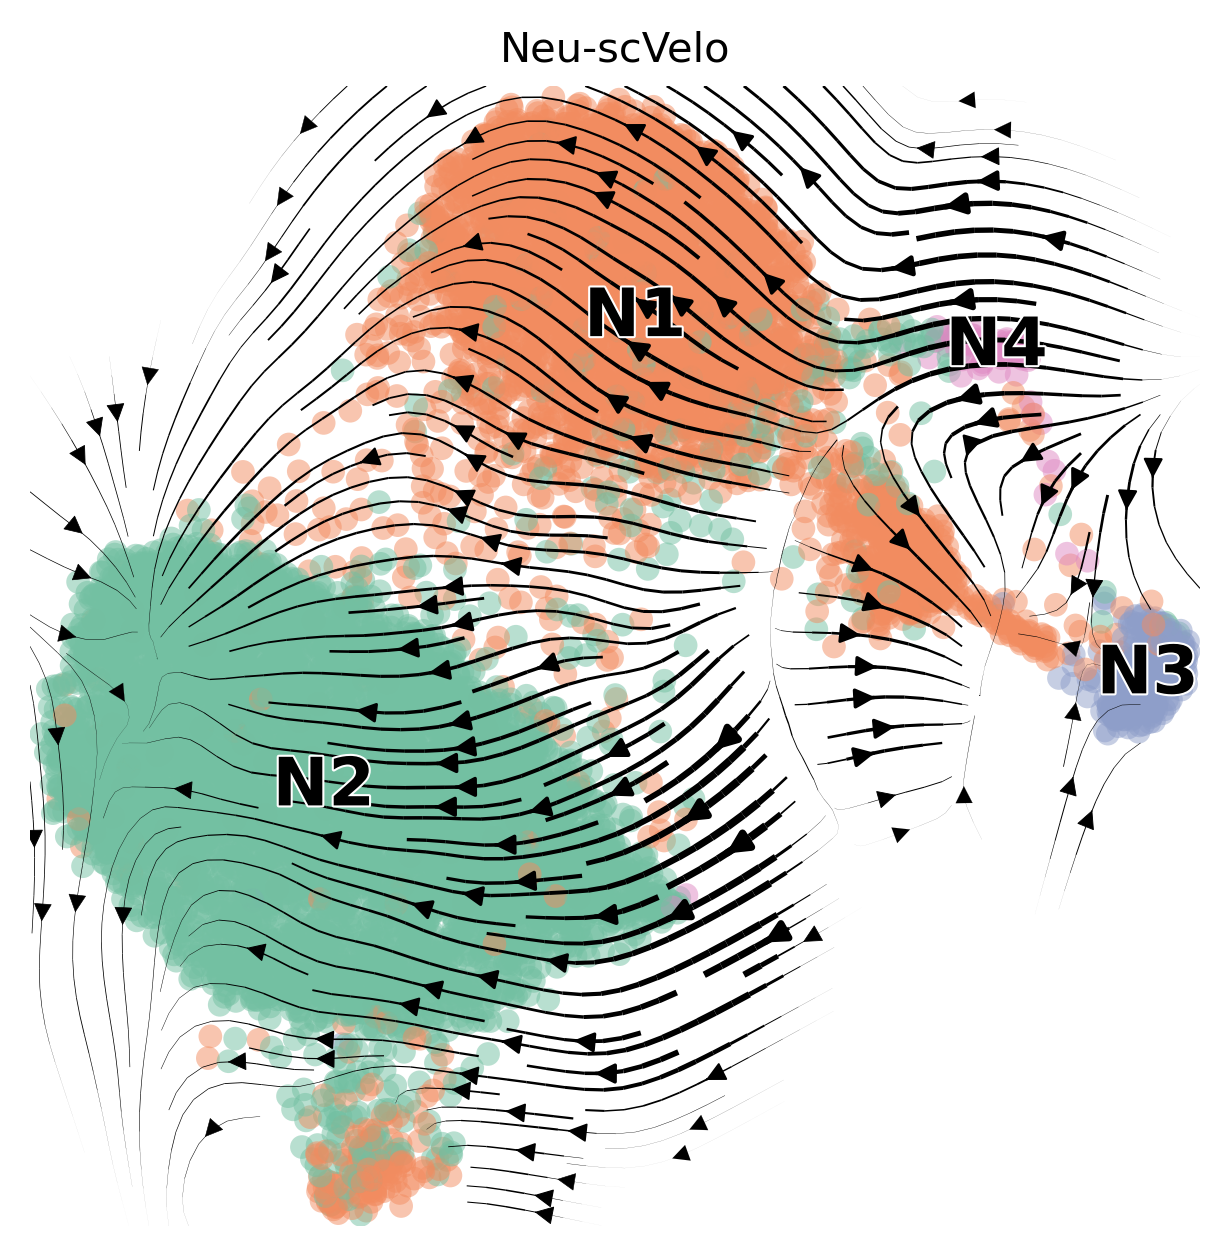

In [15]:
#ident_colours = ["#73C0A2", , "#8E9EC9", "#DF89C3"] 
ident_colours = [ "#F28C60","#73C0A2", "#8E9EC9", "#DF89C3"] 
scv.pl.velocity_embedding_stream(sample_one, basis='X_umap',color = "cell_clusters_new",palette = ident_colours,smooth=2,density=2,alpha=0.5,figsize=(5,5),save="scvelo-neu.velo.20230219.pdf",fontsize=10,legend_fontsize=16,dpi=150,title="Neu-scVelo")

In [ ]:
scv.pl.velocity_embedding_stream()

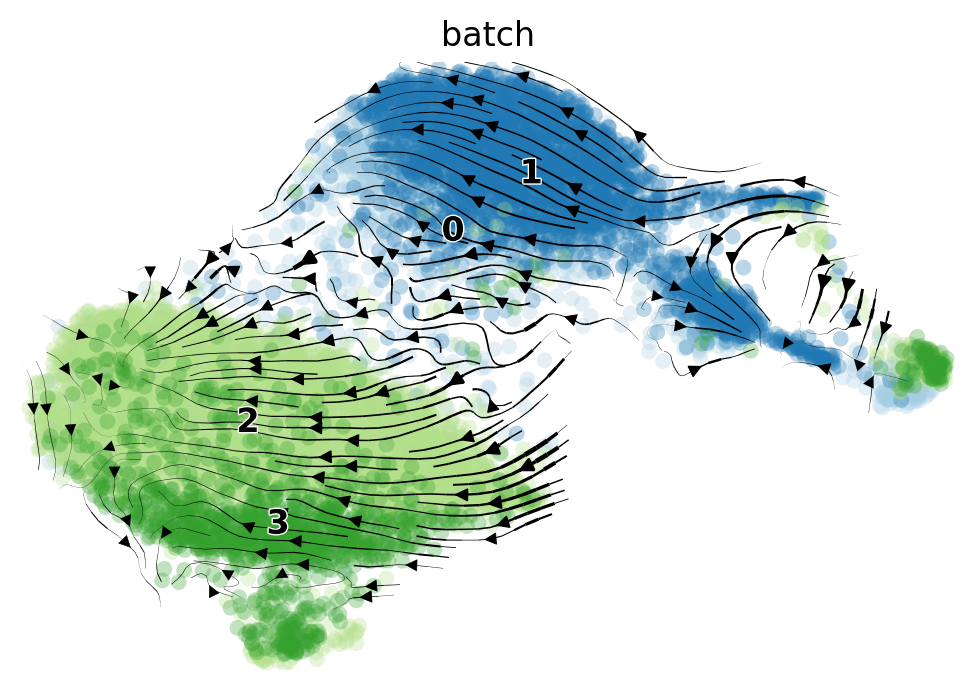

In [25]:
ident_colours=["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C"]
scv.pl.velocity_embedding_stream(sample_one, basis='X_umap',color = "batch",palette = ident_colours)
scv.pl.velocity_embedding_stream()

In [45]:
sample_one

AnnData object with n_obs × n_vars = 9752 × 117
    obs: 'Clusters', '_X', '_Y', 'cell_clusters', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'cell_clusters_colors'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [10]:
help(scv.tl.velocity)

Help on function velocity in module scvelo.tools.velocity:

velocity(data, vkey='velocity', mode='stochastic', fit_offset=False, fit_offset2=False, filter_genes=False, groups=None, groupby=None, groups_for_fit=None, constrain_ratio=None, use_raw=False, use_latent_time=None, perc=[5, 95], min_r2=0.01, min_likelihood=0.001, r2_adjusted=None, use_highly_variable=True, diff_kinetics=None, copy=False, **kwargs)
    Estimates velocities in a gene-specific manner.
    
    The steady-state model [Manno18]_ determines velocities by quantifying how
    observations deviate from a presumed steady-state equilibrium ratio of unspliced to
    spliced mRNA levels. This steady-state ratio is obtained by performing a linear
    regression restricting the input data to the extreme quantiles. By including
    second-order moments, the stochastic model [Bergen19]_ exploits not only the balance
    of unspliced to spliced mRNA levels but also their covariation. By contrast, the
    likelihood-based dynami

In [26]:
obs3_umap.head()

,UMAP_1,UMAP_2
cellname,,
AAAGGATGTCGCGGTT,2.977619,2.048346
AAAGGGCCATGATCTG,-2.835879,-2.061286
AAACCCAAGTAACAGT,-1.456223,0.534470
AAACGAAGTCGTTATG,5.636168,1.092731
AAAGAACTCCTGTAGA,0.714525,3.528162


In [31]:
Counter(sample_one.obs['cell_clusters'])

Counter({'c1_reside Siglecf(hi)': 3473,
         'c2_reside Cxcr4(hi)': 1047,
         'c0_reside Sell(hi)': 4615,
         'c3_immature': 381,
         'c4_young Ngp/Mmp8(hi)': 186})

In [30]:
from collections import Counter

In [39]:
obs3


,group,sample,celltype,cellname,UMAP_1,UMAP_2
cellname,,,,,,


In [90]:
f19_filter

AnnData object with n_obs × n_vars = 1258 × 36601
    obs: 'Clusters', '_X', '_Y', 'cell_clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [92]:

f19_filter.var_names
f19_filter.obs_names

Index(['AAACGCTGTTATTCTC', 'AAAGGATGTCGCGGTT', 'AAAGGGCCATGATCTG',
       'AAACCCAAGTAACAGT', 'AAACGAAGTCGTTATG', 'AAAGAACGTACGTTCA',
       'AAAGAACAGATCACCT', 'AAACGAATCATCGCAA', 'AAAGGGCCATCAACCA',
       'AAACGAAGTCCAGAAG',
       ...
       'TTTAGTCCACATAGCT', 'TTTCACAGTAGAGCTG', 'TTTGACTCATTGGATC',
       'TTTGGAGGTAGGGAGG', 'TTTGGTTTCCTAAGTG', 'TTTGGTTGTCGGTAAG',
       'TTTGACTTCGCGCCAA', 'TTTGGTTGTTTCGTAG', 'TTTGGTTCAGCTCTGG',
       'TTTGTTGAGGTCGTAG'],
      dtype='object', length=1258)

In [59]:
f19_filter.layers['spliced']


<4493x36601 sparse matrix of type '<class 'numpy.uint16'>'
	with 36874 stored elements in Compressed Sparse Row format>

In [77]:
f17_filter.layers['spliced'].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [75]:
adata=f19_filter

In [76]:
adata

AnnData object with n_obs × n_vars = 1258 × 36601
    obs: 'Clusters', '_X', '_Y', 'cell_clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'